In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()



In [19]:
dataset = pd.read_csv(r'datasets/iris.csv')
dataset.head()



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
DS = fit_cols(dataset,dataset.iloc[:,0:3],Min_Max)
DS = one_hot_cols(DS,['variety'])

DS.head(20)

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,0.222222,0.625000,0.067797,0.2,1,0,0
1,0.166667,0.416667,0.067797,0.2,1,0,0
2,0.111111,0.500000,0.050847,0.2,1,0,0
3,0.083333,0.458333,0.084746,0.2,1,0,0
4,0.194444,0.666667,0.067797,0.2,1,0,0
5,0.305556,0.791667,0.118644,0.4,1,0,0
6,0.083333,0.583333,0.067797,0.3,1,0,0
7,0.194444,0.583333,0.084746,0.2,1,0,0
8,0.027778,0.375000,0.067797,0.2,1,0,0
9,0.166667,0.458333,0.084746,0.1,1,0,0


In [21]:
X_train, X_test, Y_train, Y_test = split_Dataset(DS,['variety_Setosa','variety_Versicolor','variety_Virginica'])
Y_test

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [22]:
X_train = Variable(torch.Tensor(X_train).float())
X_test= Variable(torch.Tensor(X_test).float())
Y_train= Variable(torch.Tensor(Y_train).float())
Y_test= Variable(torch.Tensor(Y_test).float())

In [23]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4,16)
        self.fc2 = nn.Linear(16,12)
        self.output = nn.Linear(12,3)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x


In [24]:
net = Net()
net

Net(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

In [25]:


criterion =nn.CrossEntropyLoss() #entropia cruzada
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

epochs = 200
loss_arr = []
for i in range(epochs):
    y_hat = net.forward(X_train)
    loss = criterion(y_hat, Y_train)
    loss_arr.append(loss)
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    



Epoch: 0 Loss: 1.0532525777816772
Epoch: 10 Loss: 0.8543276190757751
Epoch: 20 Loss: 0.5783854126930237
Epoch: 30 Loss: 0.4199819564819336
Epoch: 40 Loss: 0.3247857689857483
Epoch: 50 Loss: 0.23879596590995789
Epoch: 60 Loss: 0.15769870579242706
Epoch: 70 Loss: 0.10872821509838104
Epoch: 80 Loss: 0.08738765120506287
Epoch: 90 Loss: 0.07570787519216537
Epoch: 100 Loss: 0.06706952303647995
Epoch: 110 Loss: 0.06080181524157524
Epoch: 120 Loss: 0.056114885956048965
Epoch: 130 Loss: 0.05265519395470619
Epoch: 140 Loss: 0.0503091998398304
Epoch: 150 Loss: 0.04961847513914108
Epoch: 160 Loss: 0.04810258001089096
Epoch: 170 Loss: 0.04753687605261803
Epoch: 180 Loss: 0.0471121110022068
Epoch: 190 Loss: 0.04684017598628998


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

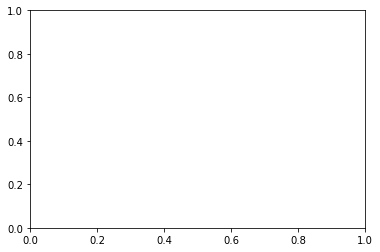

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(loss_arr, label='Loss')
plt.show()

In [98]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = net.forward(val)
        preds.append(y_hat.argmax().item())

        
df = pd.DataFrame({'Y': Y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

df

,Y,YHat,Correct
0,"(tensor(1.), tensor(0.), tensor(0.))",0,0
1,"(tensor(0.), tensor(1.), tensor(0.))",1,0
2,"(tensor(0.), tensor(1.), tensor(0.))",1,0
3,"(tensor(1.), tensor(0.), tensor(0.))",0,0
4,"(tensor(0.), tensor(0.), tensor(1.))",2,0
5,"(tensor(0.), tensor(1.), tensor(0.))",1,0
6,"(tensor(0.), tensor(0.), tensor(1.))",2,0
7,"(tensor(1.), tensor(0.), tensor(0.))",0,0
8,"(tensor(1.), tensor(0.), tensor(0.))",0,0
9,"(tensor(0.), tensor(0.), tensor(1.))",2,0
